# *Heart Disease Diagnostic Analysis*

Heart disease is a term covering any disorder of the heart. Heart diseases have become a major concern to deal with as studies show that the number of deaths due to heart diseases have increased significantly over the past few decades in India it has become the leading cause of death in India. A study shows that from 1990 to 2016 the death rate due to heart diseases have increased around 34% from 155.7 to 209.1 deaths per 1 lakh population in India. Thus, preventing heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


ATTRIBUTES
There are thirteen features in Dataset

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm/Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment (Value 2: upsloping, Value 1: flat, Value 0: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defectt)

num: Heart disease (0 = no, 1 = yes)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Describing the basic statistics of the data.

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

Checking Unique Values In CA

In [9]:
df['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In "ca" there should be 4 values.The number of major vessels (0-3).Changing 5th Value to NAN.

In [10]:
df.loc[df['ca']==4,'ca']= np.NaN

In [11]:
df['ca'].value_counts()

0.0    578
1.0    226
2.0    134
3.0     69
Name: ca, dtype: int64

CHECKING UNIQUE VALUES IN thal

In [12]:
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

same as "ca" in "thal" we have 4 values but according to given information we have 3 so changing 4th value to nan

In [13]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
14,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
319,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
329,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
359,53,0,2,128,216,0,0,115,0,0.0,2,0.0,0,1
686,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
734,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0
893,52,1,0,128,204,1,1,156,1,1.0,1,0.0,0,0


In [14]:
df.loc[df['thal']== 0,'thal']= np.NaN

In [15]:
df['thal'].value_counts()

2.0    544
3.0    410
1.0     64
Name: thal, dtype: int64

In [16]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca          18
thal         7
target       0
dtype: int64

We changed invalid values in "ca" and "thal" with nan. Now we have NaN values in it.So we replace it with median

In [17]:
df= df.fillna(df.median())

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [19]:
df['thal'].unique()

array([3., 2., 1.])

HERE WE ARE CHANGING NUMERICAL VARIABLES INTO CATEGORICAL VALUES FOR EASY VISUALIZATION

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2.0,3.0,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0.0,3.0,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0.0,3.0,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1.0,3.0,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3.0,2.0,0


In [21]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({1: "typical_angina", 
                          2: "atypical_angina", 
                          3:"non-anginal pain",
                          4: "asymtomatic"})
df['slope'] = df.slope.replace({1: "upsloping", 2: "flat",3:"downsloping"})
df['thal'] = df.thal.replace({6: "fixed_defect", 3: "reversable_defect", 7:"normal"})

In [22]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,flat,2.0,reversable_defect,No_disease
1,53,Male,0,140,203,1,0,155,1,3.1,0,0.0,reversable_defect,No_disease
2,70,Male,0,145,174,0,1,125,1,2.6,0,0.0,reversable_defect,No_disease
3,61,Male,0,148,203,0,1,161,0,0.0,flat,1.0,reversable_defect,No_disease
4,62,Female,0,138,294,1,1,106,0,1.9,upsloping,3.0,2.0,No_disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,typical_angina,140,221,0,1,164,1,0.0,flat,0.0,2.0,Disease
1021,60,Male,0,125,258,0,0,141,1,2.8,upsloping,1.0,reversable_defect,No_disease
1022,47,Male,0,110,275,0,0,118,1,1.0,upsloping,1.0,2.0,No_disease
1023,50,Female,0,110,254,0,0,159,0,0.0,flat,0.0,2.0,Disease


# *DATA VISUALIZATION*

Heart Diseases Population Percentage

In [23]:
x= df['target'].value_counts()

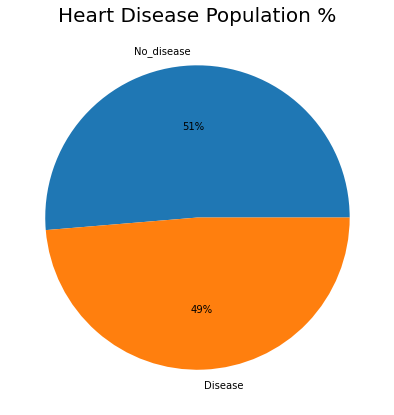

In [24]:
plt.figure(figsize=(10,7))
plt.pie(x, labels=['No_disease','Disease'],autopct='%0.0f%%')
plt.title('Heart Disease Population %', fontsize = 20)
plt.show()

From the overall population, 49% people have heart disease and 51% people do not have heart disease 

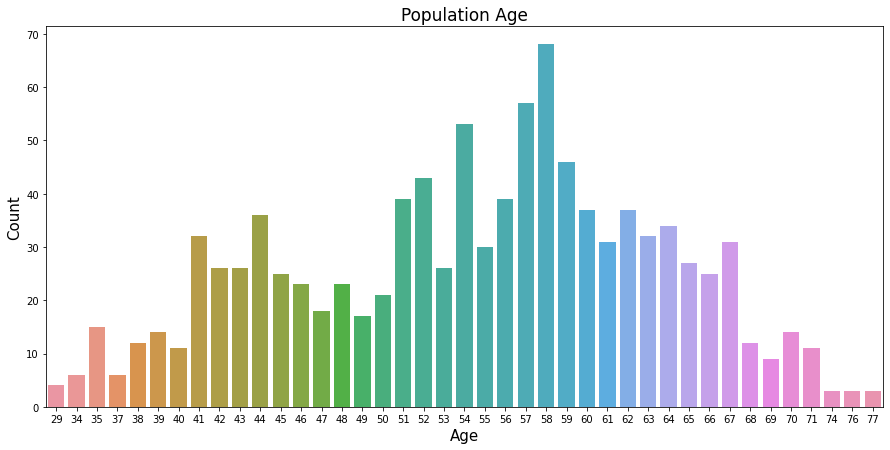

In [25]:
#Countplot of Popiulation Age

plt.figure(figsize=(15,7))
sns.countplot(x='age',data=df)
plt.title('Population Age', fontsize= 17)
plt.xlabel('Age', fontsize =15)
plt.ylabel('Count',fontsize=15)
plt.show()

By Observation, we can divide age into the 3 Age Ranges : 'elder_age','middle_age', 'young_age'.

 Statistical Analysis

In [26]:
Min_age = df['age'].min()
Max_age = df['age'].max()
Mean_age = df['age'].mean()
print("Min age is = {}".format(Min_age))
print("Max age is = {}".format(Max_age))
print("Mean age is = {}".format(Mean_age))

Min age is = 29
Max age is = 77
Mean age is = 54.43414634146342


Categorical Analysis

In [27]:
Young_age = df[(df['age']>=29)&(df['age']<40)]
Middle_age = df[(df['age']>=40)&(df['age']<55)]
Elder_age = df[df['age']>55]
print("Young Age = ",len(Young_age))
print("Middle Age = ",len(Middle_age))
print("Elder Age = ",len(Elder_age)) 

Young Age =  57
Middle Age =  419
Elder Age =  519


Converting numerical data into categorical data

In [28]:
def age_range(row):
    if row>=29 and row<40:
        return 'Young_age'
    elif row>=40 and row<55:
        return 'Middle_age'
    elif row>55:
        return 'Elder_age'

In [29]:
df["Age_range"] = df['age'].apply(age_range)


In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_range
0,52,Male,0,125,212,0,1,168,0,1.0,flat,2.0,reversable_defect,No_disease,Middle_age
1,53,Male,0,140,203,1,0,155,1,3.1,0,0.0,reversable_defect,No_disease,Middle_age
2,70,Male,0,145,174,0,1,125,1,2.6,0,0.0,reversable_defect,No_disease,Elder_age
3,61,Male,0,148,203,0,1,161,0,0.0,flat,1.0,reversable_defect,No_disease,Elder_age
4,62,Female,0,138,294,1,1,106,0,1.9,upsloping,3.0,2.0,No_disease,Elder_age


In [31]:
df["Age_range"].value_counts()

Elder_age     519
Middle_age    419
Young_age      57
Name: Age_range, dtype: int64

.

Heart Disease based on age category

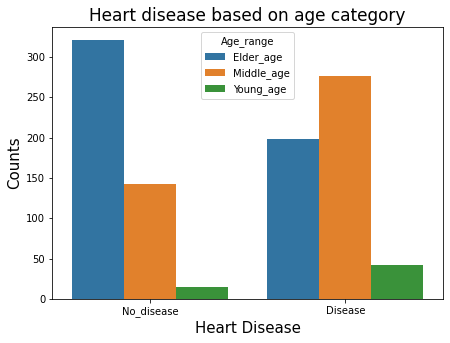

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x ='target',hue = 'Age_range',data = df, hue_order = ["Elder_age","Middle_age","Young_age"])
plt.title('Heart disease based on age category', fontsize = 17)
plt.xlabel('Heart Disease',fontsize =15)
plt.ylabel("Counts", fontsize = 15)
plt.show()

Elder Age People are most affected by Heart Disease & Young Age People are mostly FREE from any kind of Disease

.

Heart Disease based in Gender

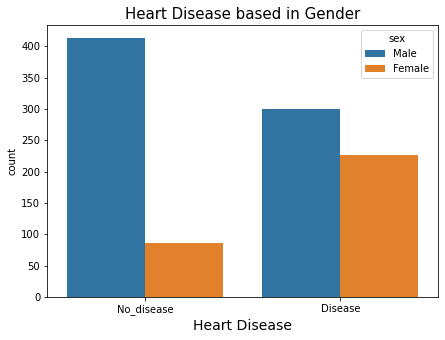

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(x='target', hue = 'sex', data = df)
plt.xlabel("Heart Disease", fontsize=14)
plt.title("Heart Disease based in Gender", fontsize = 15)
plt.show()

Males are seen more prone to Heart Disease

# Analysis On Chest Pain

Chest pain experienced based on presence or absence of heart disease :-

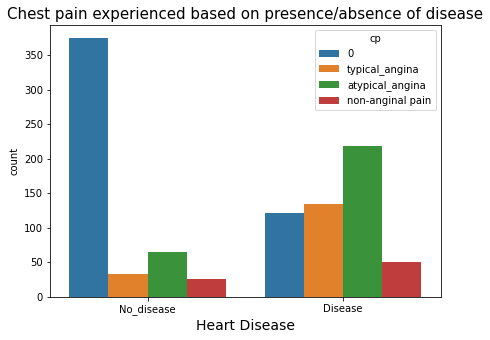

In [34]:
plt.figure(figsize=(7,5))
sns.countplot(x='target',hue ='cp',data = df)
plt.xlabel("Heart Disease",fontsize=14)
plt.title("Chest pain experienced based on presence/absence of disease",fontsize=15)
plt.show()

In [35]:
df['cp'] = df['cp'].replace(0,'asymptomatic')

In [36]:
df['cp'].value_counts()

asymptomatic        497
atypical_angina     284
typical_angina      167
non-anginal pain     77
Name: cp, dtype: int64

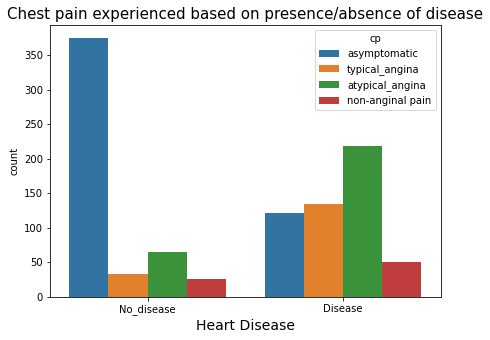

In [37]:
plt.figure(figsize=(7,5))
sns.countplot(x='target',hue ='cp',data = df)
plt.xlabel("Heart Disease",fontsize=14)
plt.title("Chest pain experienced based on presence/absence of disease",fontsize=15)
plt.show() 

People having atypical_angina have higher chance of heart disease

.

.

Chest Pain experienced based on Age

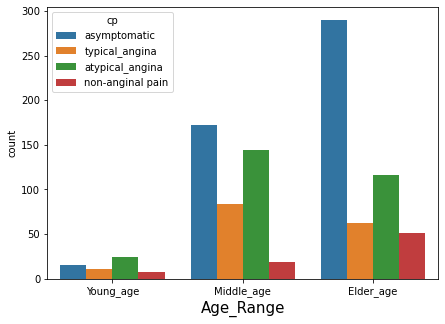

In [38]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Age_range', hue = "cp",data=df, order = ['Young_age', 'Middle_age', 'Elder_age'])
plt.xlabel('Age_Range',fontsize=(15))
plt.show()

Higher Number of Asymptomatic Pain in ELderly Age

.


.

.

Chest Pain Experienced Based on Gender

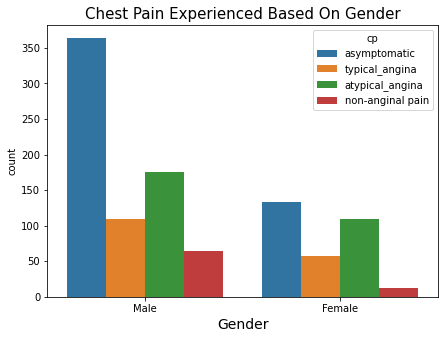

In [39]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'sex', hue='cp', data = df)
plt.xlabel("Gender", fontsize = 14)
plt.title("Chest Pain Experienced Based On Gender", fontsize = 15)
plt.show()

Higher number of men are suffering from Asymptomatic type of Chest Pain

.

.

# Analysis On Blood Pressure

Blood Pressure Based On Gender

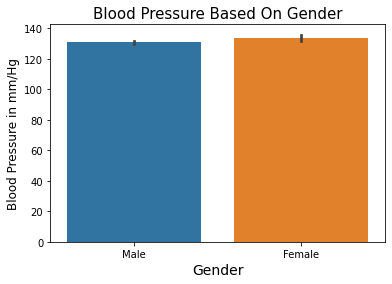

In [40]:
sns.barplot(x='sex', y = 'trestbps', data = df)
plt.title("Blood Pressure Based On Gender", fontsize = 15)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel("Blood Pressure in mm/Hg", fontsize = 12)
plt.show()

Blood Pressure Rate is almost equal in Males and Females

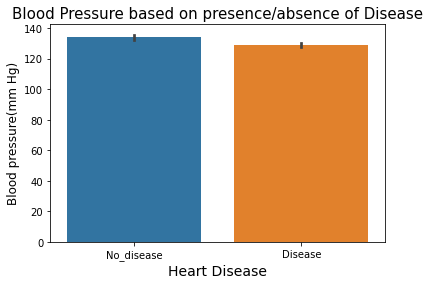

In [41]:
# Blood pressure Based on presence/absence of Disease

sns.barplot(x='target',y='trestbps', data=df)
plt.title("Blood Pressure based on presence/absence of Disease", fontsize = 15)
plt.xlabel("Heart Disease", fontsize = 14)
plt.ylabel("Blood pressure(mm Hg)", fontsize=12)
plt.show()

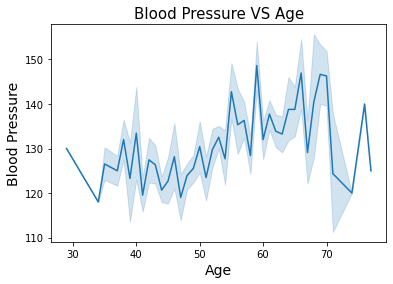

In [42]:
# Blood Pressure based on Age

sns.lineplot(x='age',y='trestbps',data=df)
plt.title("Blood Pressure VS Age",fontsize=15)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Blood Pressure",fontsize=14)
plt.show()

Blood pressure increases between age of 50 to 60 and continue till 70

# Analysis On Cholestrol Level


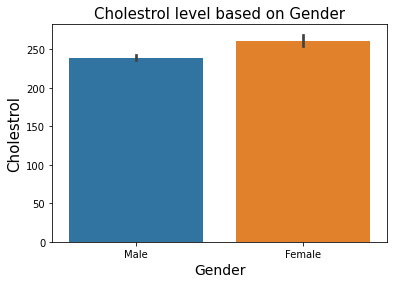

In [43]:
# Cholestrol level based on Gender

sns.barplot(x='sex',y='chol', data=df)
plt.title("Cholestrol level based on Gender", fontsize=15)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Cholestrol", fontsize=15)
plt.show()

Cholestrol levels are higher in females than males

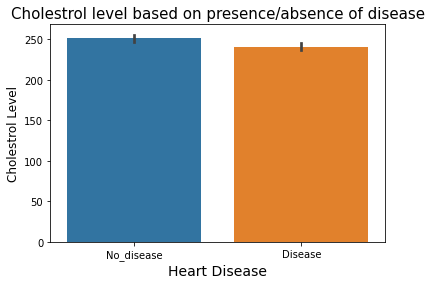

In [44]:
# Cholestrol level based on Presence/Absence of disease

sns.barplot(x="target", y='chol', data=df)
plt.title("Cholestrol level based on presence/absence of disease", fontsize=15)
plt.xlabel("Heart Disease", fontsize=14)
plt.ylabel("Cholestrol Level", fontsize=12)
plt.show()


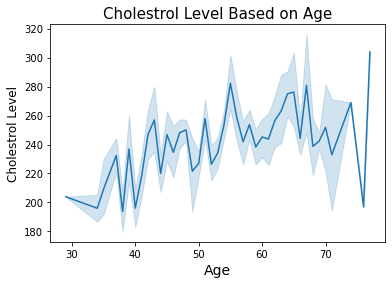

In [45]:
# Cholestrol level based on Age

sns.lineplot(x='age',y='chol', data=df)
plt.title("Cholestrol Level Based on Age", fontsize=15)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Cholestrol Level", fontsize=12)
plt.show()

Cholestrol level increases after age 50

#    Analysis On ST Depression

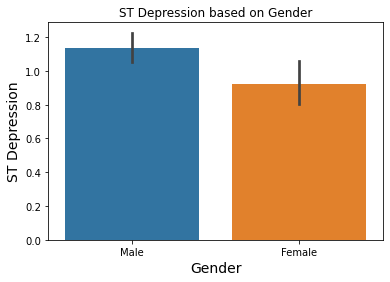

In [46]:
# ST Depression based on Gender

sns.barplot(x='sex',y='oldpeak',data=df)
plt.title("ST Depression based on Gender")
plt.xlabel("Gender", fontsize=14)
plt.ylabel("ST Depression", fontsize=14)
plt.show()

ST Depression is seen more in males than in females

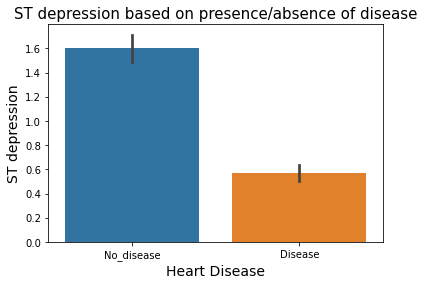

In [47]:
# ST depression based on presence/absence of disease

sns.barplot(x="target", y="oldpeak",data=df)
plt.title("ST depression based on presence/absence of disease",fontsize=15)
plt.xlabel("Heart Disease",fontsize=14)
plt.ylabel("ST depression",fontsize=14)
plt.show()

High ST depression does not have chances of heart disease


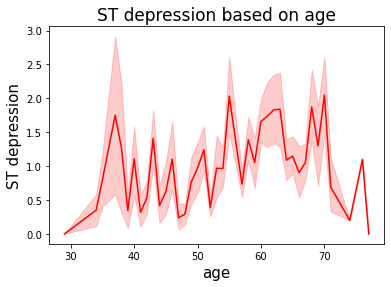

In [48]:
# ST depression based on age}
sns.lineplot(x="age", y ="oldpeak",data=df,color="r")
plt.title("ST depression based on age", fontsize=17)
plt.xlabel("age",fontsize=15)
plt.ylabel("ST depression",fontsize=15)
plt.show()

ST depression is more in ages 30-40

# Analysis On Max Heart Rate

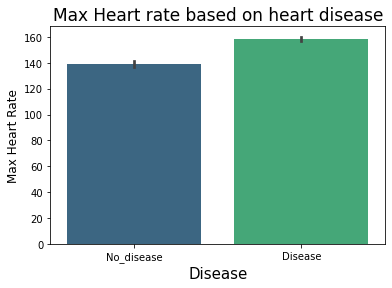

In [49]:
# Max heart rate based on heart disease

sns.barplot(x="target",y='thalach',data=df,palette='viridis')
plt.title('Max Heart rate based on heart disease',fontsize=17)
plt.xlabel("Disease",fontsize=15)
plt.ylabel("Max Heart Rate", fontsize=12)
plt.show()

Higher Blood Pressure Level results in higher chances of heart disease

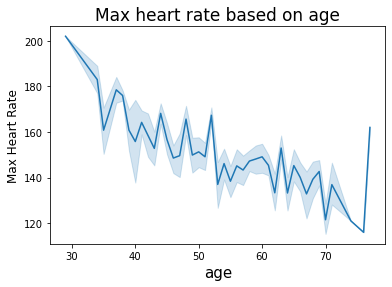

In [50]:
# Max Heart rate based on age

sns.lineplot(x='age',y='thalach',data=df,palette="plasma")
plt.title('Max heart rate based on age',fontsize=17)
plt.xlabel('age',fontsize=15)
plt.ylabel('Max Heart Rate', fontsize=12)
plt.show()


# Analysis on fasting blood sugar

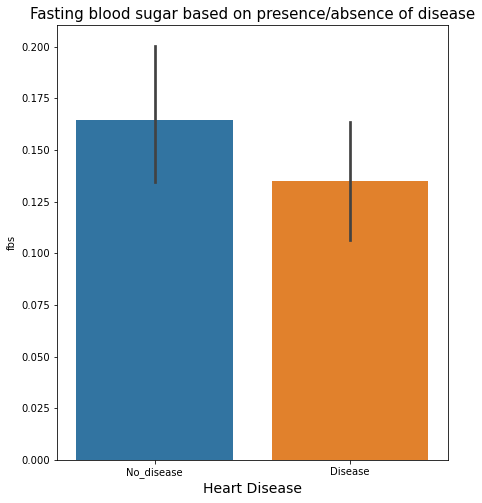

In [51]:
# Fasting blood sugar based on presence/absence of disease

plt.figure(figsize=(7,8))
sns.barplot(x='target',y='fbs',data=df)
plt.title("Fasting blood sugar based on presence/absence of disease",fontsize=15)
plt.xlabel("Heart Disease",fontsize=14)
plt.show()

More chances of disease is seen in more fasting blood sugar levels

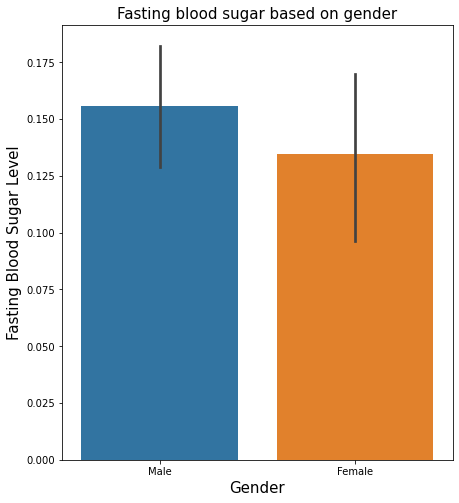

In [52]:
# Fasting blood sugar based on gender

plt.figure(figsize=(7,8))
sns.barplot(x='sex',y='fbs',data=df)
plt.title("Fasting blood sugar based on gender", fontsize=15)
plt.xlabel("Gender",fontsize=15)
plt.ylabel("Fasting Blood Sugar Level",fontsize=15)
plt.show()

Males are generally seen to have higher level of Fasting Blood Sugar

# Analysis on excercise induced Angina



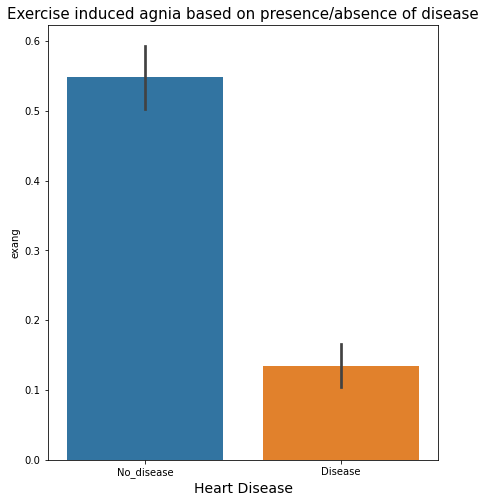

In [53]:
# Exercise induced Angina Based on presence/absence of disease

plt.figure(figsize=(7,8))
sns.barplot(x="target",y='exang',data=df)
plt.title("Exercise induced agnia based on presence/absence of disease",fontsize=15)
plt.xlabel("Heart Disease",fontsize=14)
plt.show()



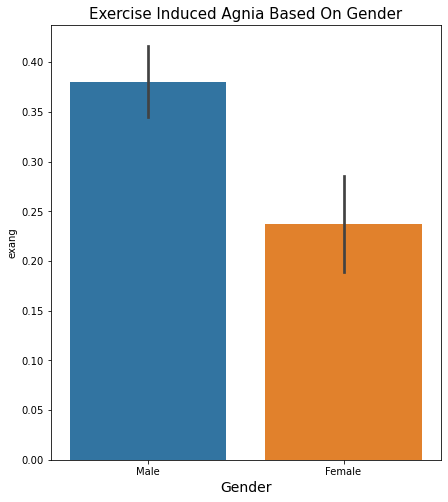

In [54]:
# Exercise induced agnia based on gender

plt.figure(figsize=(7,8))
sns.barplot(x='sex',y='exang',data=df)
plt.title("Exercise Induced Agnia Based On Gender", fontsize=15)
plt.xlabel("Gender",fontsize=14)
plt.show()

It is seen that males have high level of Exercise Based Agnia

# Heatmap

<AxesSubplot:>

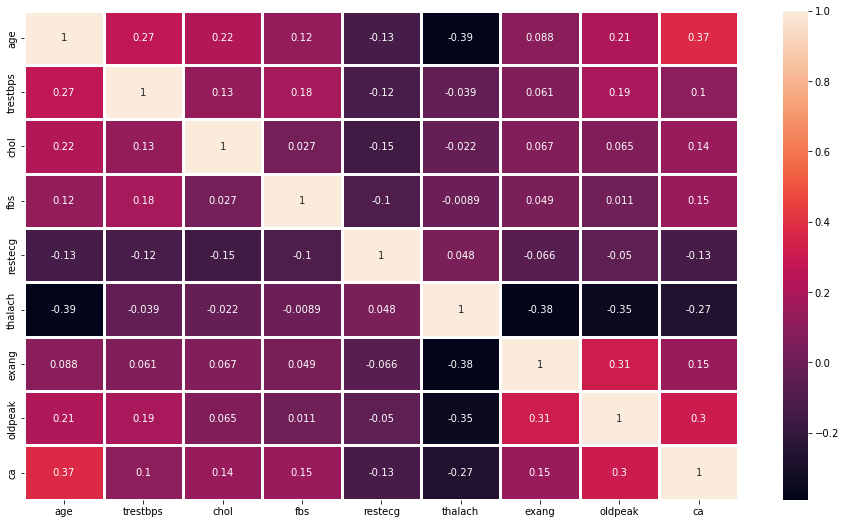

In [55]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),annot=True,linewidth=3)


In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_range
0,52,Male,asymptomatic,125,212,0,1,168,0,1.0,flat,2.0,reversable_defect,No_disease,Middle_age
1,53,Male,asymptomatic,140,203,1,0,155,1,3.1,0,0.0,reversable_defect,No_disease,Middle_age
2,70,Male,asymptomatic,145,174,0,1,125,1,2.6,0,0.0,reversable_defect,No_disease,Elder_age
3,61,Male,asymptomatic,148,203,0,1,161,0,0.0,flat,1.0,reversable_defect,No_disease,Elder_age
4,62,Female,asymptomatic,138,294,1,1,106,0,1.9,upsloping,3.0,2.0,No_disease,Elder_age


From above observation we conclude

1. From the overall population, 49% people have heart disease and 51% people do not have heart disease
2. Elder Age People are most affected by Heart Disease & Young Age People are mostly FREE from any kind of Disease
3. Males are seen more prone to Heart Disease
4. People having atypical angina have higher chance of heart disease
5. Higher Number of Asymptomatic Pain is seen in Elderly Age people.
6. Higher number of men are suffering from Asymptomatic type of Chest Pain
7. Blood Pressure Rate is almost equal in Males and Females
8. Blood pressure increases between age of 50 to 60 and continue till 70
9. Cholestrol levels are higher in females than males
10. Cholestrol level increases after age 50
11. ST Depression is seen more in males than in females
12. ST depression is more in ages 30-40
13. Higher Blood Pressure Level results in higher chances of heart disease
14. More chances of disease is seen in more fasting blood sugar levels
15. Males are generally seen to have higher level of Fasting Blood Sugar 
16. It is seen that males have high level of Exercise Based Agnia

In [58]:
df.to_csv(r'C:\Users\HP\Downloads\Heart DIsease ANalysis\new_heart_disease.csv',index=False)